#### Class Imbalances:
    For example in binary classification, one class(majority class) probability is higher compared to other class(minority class).In such cases, the model tries to overfit and predicts most of the samples to be majority class and just ignores minority class. This, inturn results in highest training accuracy.This leads to bad test accuracies.This situation is called accuracy paradox.

#### Tips to handle class imbalances:
    (1). Collect more data of minority class
    
    (2). Use other performance metrics like Precision, Recall, ROC curves, F1 score, Confusion matrix, Cohen's Kappa other than acuracy
        - high recall + high precision : the class is perfectly handled by the model
        - low recall + high precision : the model can’t detect the class well but is highly trustable when it does
        - high recall + low precision : the class is well detected but the model also include points of other classes in it
        - low recall + low precision : the class is poorly handled by the model
   
    (3). Perform resampling techniques that duplicates(minority) or removes(majority) the instances(oversampling/undersampling)
    
    (4). Use synthetic resampling techniques using SMOTE(Synthetic minority oversampling technique), SMOTEN, SMOTENC, Tomek Links
    
    (5). Try different algorithms
    
    (6). Try different penalisation techniques 
        (Penalized classification imposes an additional higher cost on the model for making classification mistakes on the minority class during training(uses in neural networks which also chnages the objective function itself).These penalties can bias the model to pay more attention to the minority class.)(Penalised SVM, Penalised LDA)
    
    (7). Try a Different Perspective(Anomaly detection and change detection)
    
    (8). Try Getting Creative
    (Decompose your larger class into smaller number of other classes, resampling the unbalanced training set into not one balanced set, but several and Running an ensemble of classifiers on these sets could produce a much better result than one classifier alone, use a One Class Classifier… (e.g. treat like outlier detection)).We can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.
    
    Info: Not always class resampling is better option.Think according to our problem and decide which is the good option.Adding new features that makes the classes well separable also helps when dealing with imbalances.
    Ref read: https://towardsdatascience.com/handling-imbalanced-datasets-in-machine-learning-7a0e84220f28

In [33]:
import pandas as pd
import imblearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from collections import Counter
from numpy import where
from sklearn.datasets import make_classification

In [4]:
data = pd.read_csv("E:\Learning\ML\Datasets\data\\titanic_kaggle\\titanic_train.csv")

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
X = data.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis='index', errors='raise')
Y = data['Survived']

In [7]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [8]:
Y.shape

(891,)

In [9]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
#Imputing with frequency for age
replace_with = X.Age.mode()[0]
X.Age.fillna(replace_with, axis='index', inplace=True)

In [11]:
#Imputing with frequency for Embarked
replace = X.Embarked.mode()[0]
X.Embarked.fillna(replace, axis=0, inplace=True)

In [12]:
X.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
#Encoding
X_enc = pd.get_dummies(X, sparse=False, drop_first=True)
X_enc.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


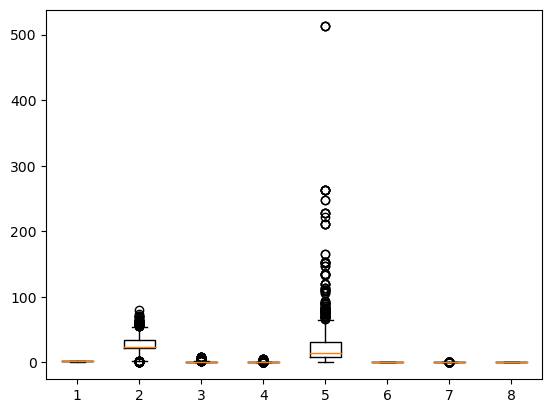

In [14]:
plt.boxplot(X_enc)
plt.show()

In [15]:
#Scaling
scaler = StandardScaler()

<AxesSubplot:ylabel='Survived'>

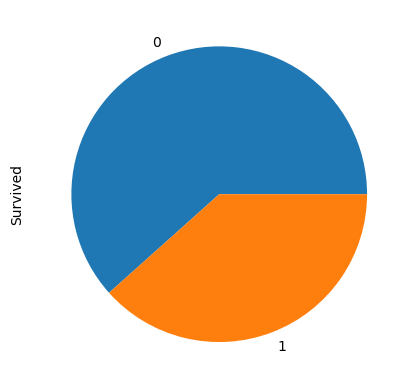

In [16]:
#Class imbalance visualisation
Y.value_counts().plot(kind='pie')

<AxesSubplot:>

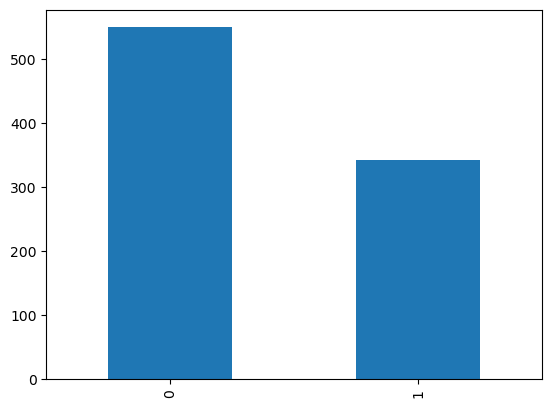

In [17]:
Y.value_counts().plot(kind='bar')

In [18]:
#Class Imbalance handling using undersampling and oversampling
class_0, class_1 = data['Survived'].value_counts()

In [19]:
class_0

549

In [20]:
class_1

342

In [21]:
#partitioning the classes
class_0_samples = data[data['Survived'] == 0]
class_1_samples = data[data['Survived'] == 1]

In [22]:
class_0_samples.shape

(549, 12)

In [23]:
class_1_samples.shape

(342, 12)

<AxesSubplot:ylabel='Survived'>

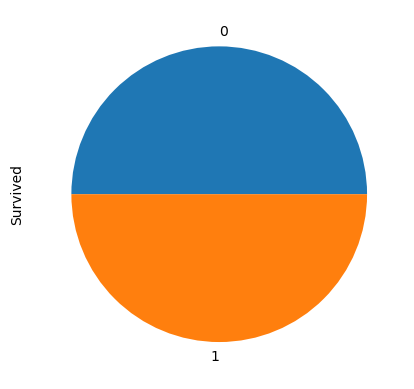

In [24]:
#Undersampling the majority '0' class to have 342 samples as minority '1' class
class_0_undersample = class_0_samples.sample(class_1, random_state=0)
train_undersample = pd.concat([class_0_undersample, class_1_samples], axis=0)
train_undersample['Survived'].value_counts().plot(kind='pie')

In [25]:
train_undersample.shape

(684, 12)

<AxesSubplot:ylabel='Survived'>

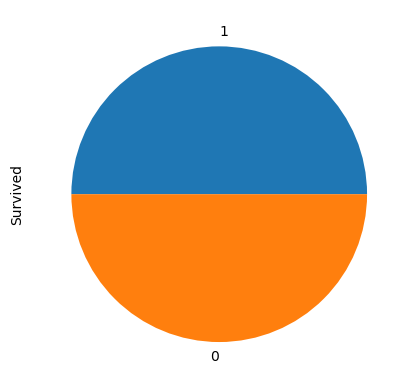

In [26]:
#Oversampling of minority '1' class with replacement to have same number of samples as majority '0' class
class_1_oversample = class_1_samples.sample(class_0, replace=True)
train_oversample = pd.concat([class_1_oversample, class_0_samples], axis=0)
train_oversample.Survived.value_counts().plot(kind='pie')

In [27]:
train_oversample.shape

(1098, 12)

In [28]:
#Resampling using imblearn - Undersampling
#Info: RandomUnderSampler randomly selecting examples from the majority class and deleting them from the training dataset. 
#Drawback: Could discard potentially useful data that could be important for the induction process.

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0, replacement=True, sampling_strategy='majority')
X_rus, Y_rus = rus.fit_resample(X_enc, Y)
print(f"Original dataset: {Counter(Y)}")
print(f"Random under sampling dataset: {Counter(Y_rus)}")

Original dataset: Counter({0: 549, 1: 342})
Random under sampling dataset: Counter({0: 342, 1: 342})


Before handling imbalance: Counter({0: 9900, 1: 100})


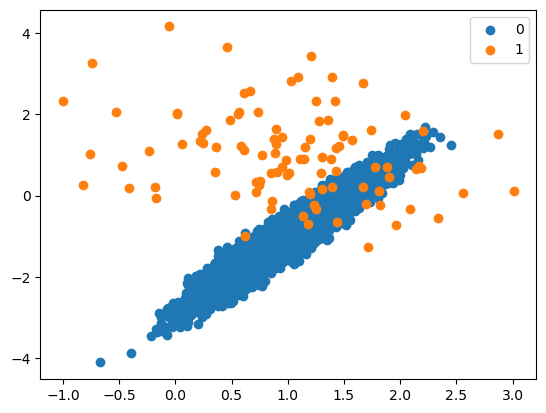

After undersampling using Random sampler: Counter({0: 100, 1: 100})


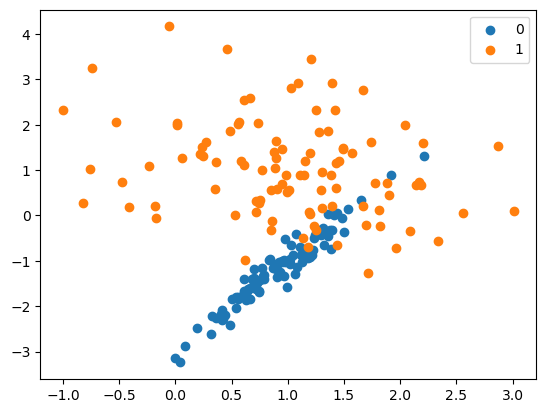

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64),)
-------------------------------
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
-------------------------------
[[ 8.96301019e-01 -1.16853273e+00]
 [ 6.49239216e-01 -1.63836229e+00]
 [ 1.48186373e+00 -4.72365164e-02]
 [ 3.29586713e-01 -2.21517506e+00]
 [ 8.24156502e-02 -2.8732

In [54]:
#Graphical representation of Random Undersampling
X , y = make_classification(n_samples=10000,n_features=2, n_clusters_per_class=1,
                            n_redundant=0, weights=[0.99], flip_y=0, random_state=0)
print(f"Before handling imbalance: {Counter(y)}")
counter = Counter(y)
#Scatter plot to show the actual dataset distribution
for label, _ in counter.items():
    row_idx = where(y == label)[0]
    plt.scatter(X[row_idx, 0], X[row_idx, 1], label=str(label))
plt.legend()
plt.show()

#Undersampling transformation
rus = RandomUnderSampler(random_state=0)
X, y = rus.fit_resample(X, y)
counter = Counter(y)
print(f"After undersampling using Random sampler: {counter}")
#Scatter plot to show the random sampling 
for label, _ in counter.items():
    row_idx = where(y == label)[0]
    plt.scatter(X[row_idx, 0], X[row_idx, 1], label=str(label))
plt.legend()
plt.show()

#Explanation of the loop below that generated scatter plot
for label, _ in counter.items():
    print(where(y == label))
    print("-------------------------------")
    row_idx = where(y == label)[0]
    print(row_idx) #getting the array indices of respective class
    print("-------------------------------")
    print(X[row_idx]) #getting the input of respective labels
    print("-------------------------------")
    print(X[row_idx, 0]) #getting first input feature x1
    print("-------------------------------")
    print(X[row_idx, 1]) #getting second input feature x2
    print("-------------------------------")
    break



In [29]:
#Resampling using imblearn - Oversampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_ros, Y_ros = ros.fit_resample(X_enc, Y)

print(f"Original dataset: {Counter(Y)}")
print(f"Random under sampling dataset: {Counter(Y_ros)}")

Original dataset: Counter({0: 549, 1: 342})
Random under sampling dataset: Counter({0: 549, 1: 549})


Before handling imbalance: Counter({0: 9900, 1: 100})


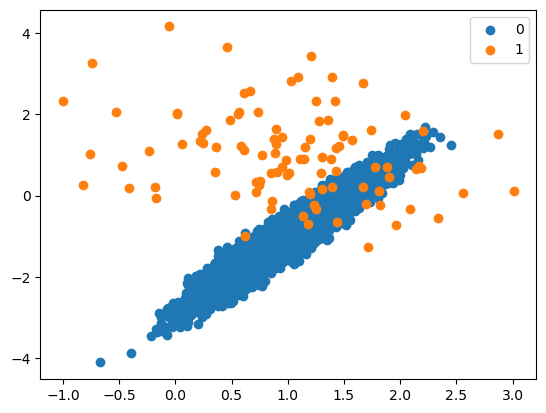

After oversampling using Random sampler: Counter({0: 9900, 1: 9900})


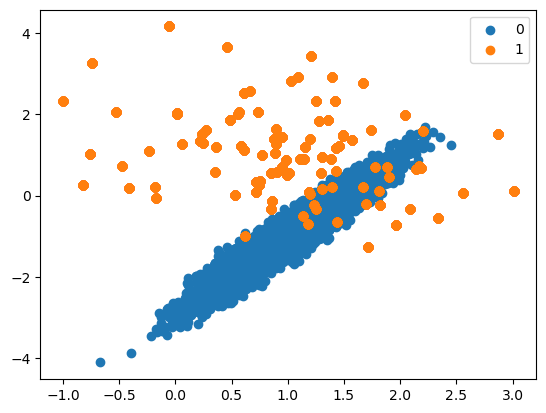

In [55]:
#Graphical representation of Random Oversampling
X , y = make_classification(n_samples=10000,n_features=2, n_clusters_per_class=1,
                            n_redundant=0, weights=[0.99], flip_y=0, random_state=0)
print(f"Before handling imbalance: {Counter(y)}")
counter = Counter(y)
#Scatter plot to show the actual dataset distribution
for label, _ in counter.items():
    row_idx = where(y == label)[0]
    plt.scatter(X[row_idx, 0], X[row_idx, 1], label=str(label))
plt.legend()
plt.show()

#Undersampling transformation
r0s = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
counter = Counter(y)
print(f"After oversampling using Random sampler: {counter}")
#Scatter plot to show the random sampling 
for label, _ in counter.items():
    row_idx = where(y == label)[0]
    plt.scatter(X[row_idx, 0], X[row_idx, 1], label=str(label))
plt.legend()
plt.show()

#### Observation:
    The scatter plot of both Random sampler oversampling and undersampling shows the adding or removing the instances randomly.Measures or heuristics like distances and neighbors are not considered.

In [30]:
#Under-sampling: Tomek links

#Info : Tomek links are pairs of very close instances but of opposite classes. 
#Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.
#Tomek’s link exists if the two samples are the nearest neighbors of each other

from imblearn.under_sampling import TomekLinks

tmkl = TomekLinks()
X_tmkl, Y_tmkl = tmkl.fit_resample(X_enc, Y)
print(f"Original dataset: {Counter(Y)}")
print(f"Tomek under sampling dataset: {Counter(Y_tmkl)}")

Original dataset: Counter({0: 549, 1: 342})
Tomek under sampling dataset: Counter({0: 489, 1: 342})


Before handling imbalance Counter({0: 9900, 1: 100})


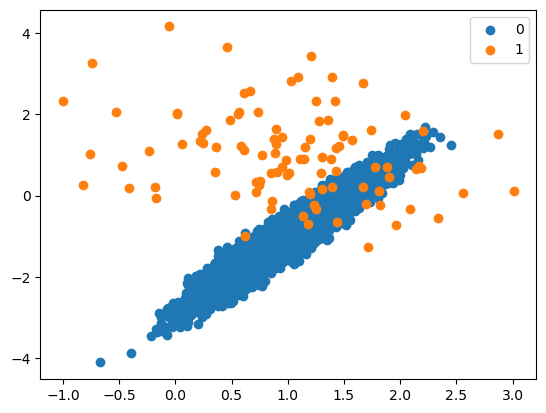

After handling imbalance using Tomek: Counter({0: 9890, 1: 100})


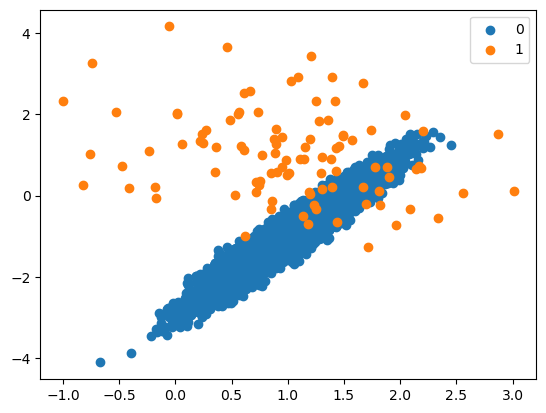

In [56]:
#Graphical distribution
from imblearn.under_sampling import TomekLinks

# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=0)
# summarize class distribution
counter = Counter(y)
print(f"Before handling imbalance {counter}")
#Graphical representation
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()
# define the undersampling method
undersample = TomekLinks()
# transform the dataset
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(f"After handling imbalance using Tomek: {counter}")
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#### Observation:
    The scatter plot shows that nearest majority class examples to the minority class examples, speciall across the border line were removed.Tomek procedure only removes Tomek Links, we would not expect the resulting transformed dataset to be balanced, only less ambiguous along the class boundary.This highlights that although finding the ambiguous examples on the class boundary is useful, alone, it is not a great undersampling technique. In practice, the Tomek Links procedure is often combined with other methods, such as the Condensed Nearest Neighbor Rule.The choice to combine Tomek Links and CNN is natural, as Tomek Links can be said to remove borderline and noisy instances, while CNN removes redundant instances.

Before handling imbalance Counter({0: 9900, 1: 100})


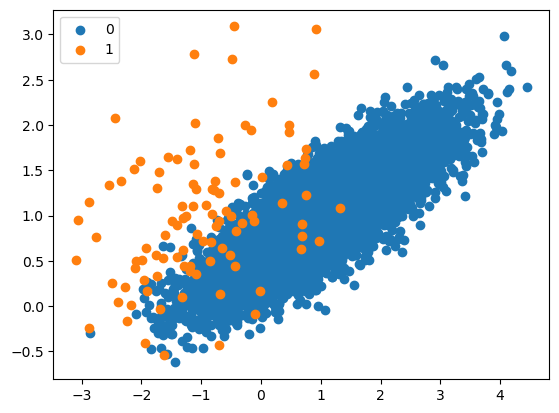

After handling imbalance using Condensed Nearest Nieghbor Counter({0: 189, 1: 100})


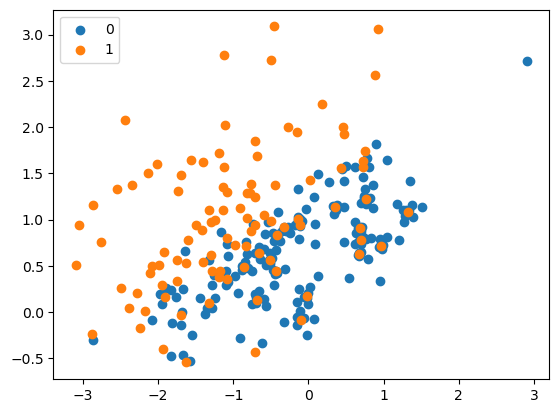

In [58]:
#CondensedNearestNeighbour - Undersampling technique

#Info: CNN seeks a subset of a collection of samples that results in no loss in model performance, referred to as a minimal consistent set.
#It is achieved by enumerating the examples in the dataset and adding them to the “store” only if they cannot be classified correctly by the current contents of the store. 
#When used for imbalanced classification, the store is comprised of all examples in the minority set and only examples from the majority set that cannot be classified correctly are added incrementally to the store.
#During the procedure, the KNN algorithm is used to classify points to determine if they are to be added to the store or not. 
#The k value is set via the n_neighbors argument and defaults to 1.Smaller k values are preferred as the method is very slow

from imblearn.under_sampling import CondensedNearestNeighbour

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(f"Before handling imbalance {counter}")
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()
cnn = CondensedNearestNeighbour(n_neighbors=1)
X, y = cnn.fit_resample(X, y)
counter = Counter(y)
print(f"After handling imbalance using Condensed Nearest Nieghbor {counter}")
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#### Observation:
     We can see that the focus of the algorithm is those examples in the minority class along the decision boundary between the two classes, specifically, those majority examples around the minority class examples.

In [31]:
#SMOTE (Synthetic Minority Oversampling Technique) 
#It works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. 
#The synthetic points are added between the chosen point and its neighbors.

from imblearn.over_sampling import SMOTE

sm = SMOTE(k_neighbors=10, random_state=0)
X_sm, Y_sm = sm.fit_resample(X_enc, Y)
print(f"Original dataset: {Counter(Y)}")
print(f"Oversampling using SMOTE dataset: {Counter(Y_sm)}")

Original dataset: Counter({0: 549, 1: 342})
Oversampling using SMOTE dataset: Counter({0: 549, 1: 549})


Before handling imbalance Counter({0: 9900, 1: 100})


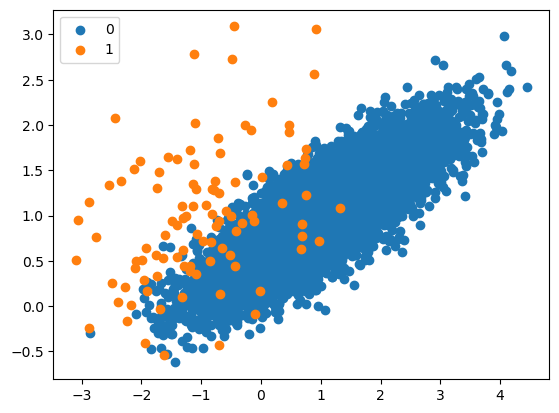

After handling imbalance using SMOTE: Counter({0: 9900, 1: 9900})


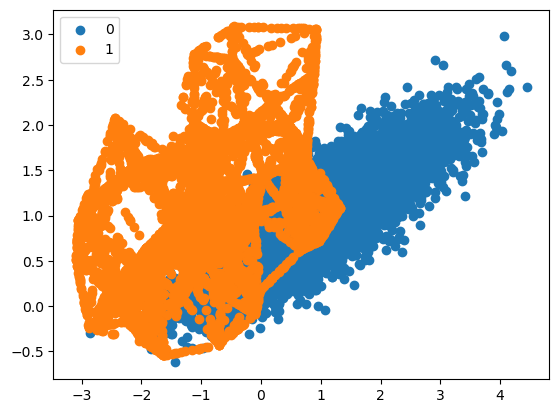

In [59]:
#SMOTE - Graphical representation
from imblearn.over_sampling import SMOTE

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(f"Before handling imbalance {counter}")
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()
sm = SMOTE(k_neighbors=10, random_state=0)
X, y = sm.fit_resample(X, y)
counter = Counter(y)
print(f"After handling imbalance using SMOTE: {counter}")
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

In [32]:
#NearMiss is an under-sampling technique.
#Info: Near Miss select examples based on the distance of majority class examples to minority class examples. 
#Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.
#Three versions - 1, 2 and 3

from imblearn.under_sampling import NearMiss

nm = NearMiss(n_neighbors=10)
X_nm, Y_nm = nm.fit_resample(X_enc, Y)
print(f"Original dataset: {Counter(Y)}")
print(f"Oversampling using SMOTE dataset: {Counter(Y_nm)}")

Original dataset: Counter({0: 549, 1: 342})
Oversampling using SMOTE dataset: Counter({0: 342, 1: 342})


Before handling imbalance Counter({0: 9900, 1: 100})


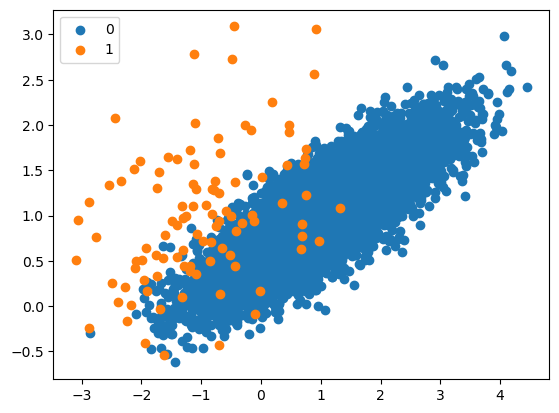

After handling imbalance using Near miss-1: Counter({0: 100, 1: 100})


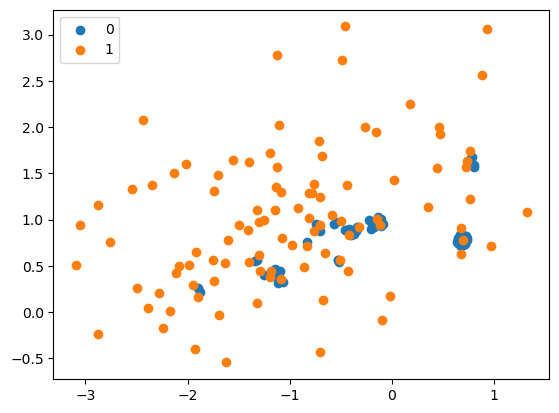

In [62]:
#Nearmiss1 - Graphical representation
#Info :NearMiss-1 selects only those majority class examples that have a minimum distance to three minority class instances, defined by the n_neighbors argument.

from imblearn.under_sampling import NearMiss

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(f"Before handling imbalance {counter}")
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()
nm = NearMiss(n_neighbors=3, version=1)
X, y = nm.fit_resample(X, y)
counter = Counter(y)
print(f"After handling imbalance using Near miss-1: {counter}")
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#### Observation:
    We can see that only those examples in the majority class that are closest to the 3 minority class examples in the overlapping area were retained.

Before handling imbalance Counter({0: 9900, 1: 100})


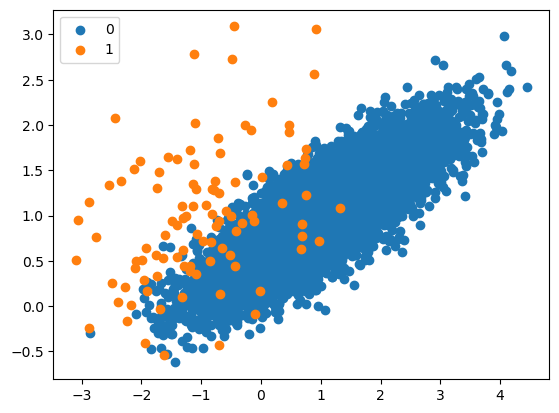

After handling imbalance using Near miss-2: Counter({0: 100, 1: 100})


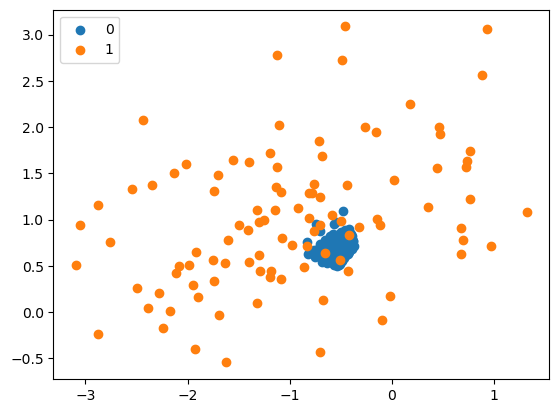

In [63]:
#Nearmiss2 - Graphical representation
#Info: NearMiss-2 is inverse to NearMiss-1. It selects examples that are closest to the most distant examples from the minority class, defined by the n_neighbors argument.

from imblearn.under_sampling import NearMiss

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(f"Before handling imbalance {counter}")
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()
nm = NearMiss(n_neighbors=3, version=2)
X, y = nm.fit_resample(X, y)
counter = Counter(y)
print(f"After handling imbalance using Near miss-2: {counter}")
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#### Observation:
     We can see that Near miss 2 selects examples from majority class that are closest to the most distant examples from the minority class

Before handling imbalance Counter({0: 9900, 1: 100})


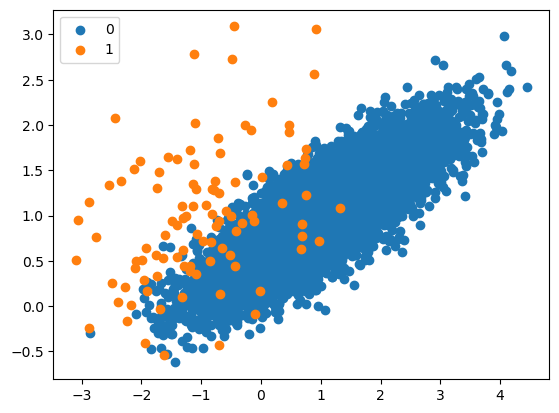

After handling imbalance using Near miss-3: Counter({0: 100, 1: 100})


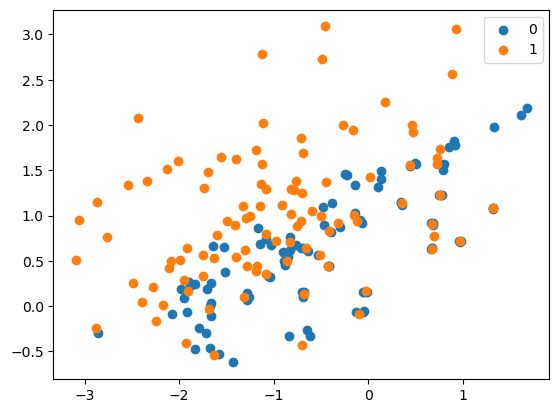

In [65]:
#Nearmiss3 - Graphical representation
#Info: #NearMiss-3 selects the closest examples from the majority class for each minority class.
#The n_neighbors_ver3 argument determines the number of examples to select for each minority example, although the desired balancing ratio set via sampling_strategy

from imblearn.under_sampling import NearMiss

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(f"Before handling imbalance {counter}")
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()
nm = NearMiss(version=3, n_neighbors_ver3=3)
X, y = nm.fit_resample(X, y)
counter = Counter(y)
print(f"After handling imbalance using Near miss-3: {counter}")
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#### Observation: 
    We can see that each example in the minority class that was in the region of overlap with the majority class has up to three neighbors from the majority class.

Before handling imbalance Counter({0: 9900, 1: 100})


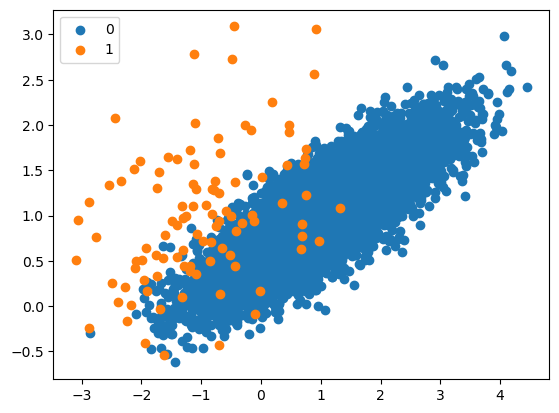

After handling imbalance using ENN: Counter({0: 9806, 1: 100})


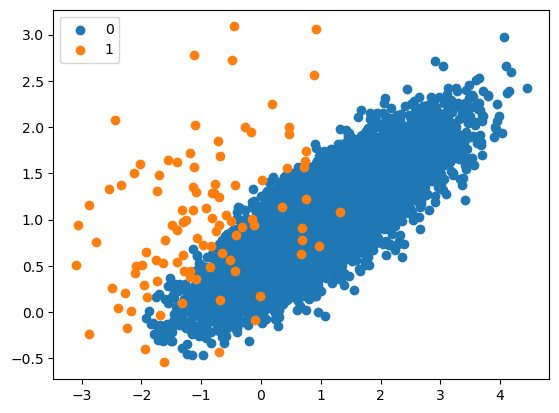

In [67]:
### Edited Nearest Neighbor Rule - Undersampling
#Info: Another rule for finding ambiguous and noisy examples in a dataset is called Edited Nearest Neighbors
#Working: For each instance'a' in the dataset, its three nearest neighbors are computed. 
#If 'a' is a majority class instance and is misclassified by its three nearest neighbors, then 'a' is removed from the dataset. 
#Alternatively, if 'a' is a minority class instance and is misclassified by its three nearest neighbors, then the majority class instances among a's neighbors are removed.

from imblearn.under_sampling import EditedNearestNeighbours

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(f"Before handling imbalance {counter}")
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()
enn = EditedNearestNeighbours(n_neighbors=3)
X, y = enn.fit_resample(X, y)
counter = Counter(y)
print(f"After handling imbalance using ENN: {counter}")
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#Note: Like Tomek Links, the Edited Nearest Neighbor Rule gives best results when combined with another undersampling method.

#### Observation: 
    Like Tomek Links, the ENN procedure only removes noisy and ambiguous points along the class boundary. As such, we would not expect the resulting transformed dataset to be balanced.

Before handling imbalance Counter({0: 9900, 1: 100})


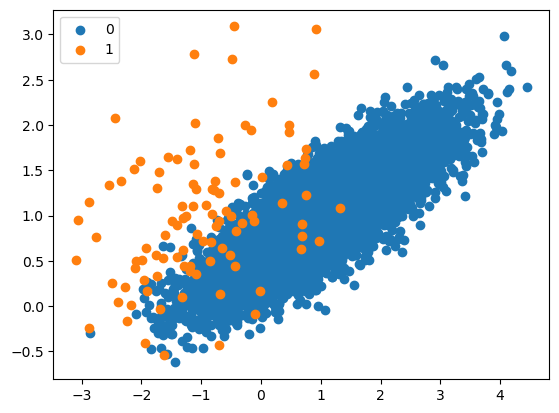

After handling imbalance using OSS: Counter({0: 1063, 1: 100})


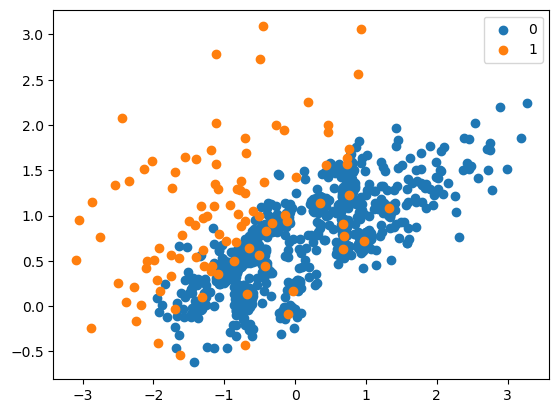

In [68]:
#One-Sided Selection - Undersampling
#Info: One-Sided Selection combines Tomek Links and the Condensed Nearest Neighbor (CNN) Rule.
#Tomek Links are ambiguous points on the class boundary and are identified and removed in the majority class.
#The CNN method is then used to remove redundant examples from the majority class that are far from the decision boundary.
#The number of seed examples can be set with n_seeds_S and defaults to 1 and the k for KNN can be set via the n_neighbors argument and defaults to 1.
#Note: It is more useful to have a larger seed sample of the majority class in order to effectively remove redundant examples.

from imblearn.under_sampling import OneSidedSelection

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
counter = Counter(y)
print(f"Before handling imbalance {counter}")
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()
oss = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X, y = oss.fit_resample(X, y)
counter = Counter(y)
print(f"After handling imbalance using OSS: {counter}")
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

#### Observation:
    We can see that a large number of examples from the majority class were removed, consisting of both redundant examples (removed via CNN) and ambiguous examples (removed via Tomek Links). The ratio for this dataset is now around 1:10, down from 1:100.

In [4]:
#Penalize Algorithms (Cost-Sensitive Training)
#A popular algorithm for this technique is Penalized-SVM.
#During training, we can use the argument class_weight=’balanced’ to penalize mistakes on the minority class by an amount proportional to how under-represented it is.
#We also want to include the argument probability=True if we want to enable probability estimates for SVM algorithms.

from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
svc_model.fit(x_train, y_train)

svc_predict = svc_model.predict(x_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.9334351145038168
Accuracy score: 0.9466666666666667
F1 score: 0.20720720720720723
